In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
tit = pd.read_csv('C:/Users/atharv/Downloads/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [14]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# find empty data
tit.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

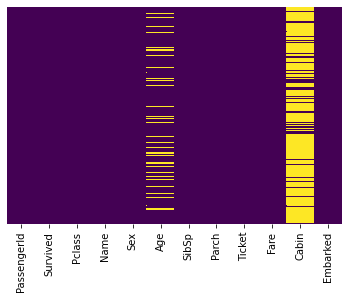

In [8]:
sns.heatmap(tit.isnull(), yticklabels=False, cmap='viridis', cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

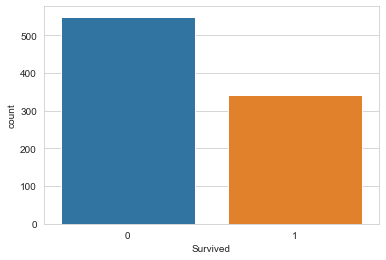

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=tit)

<AxesSubplot:xlabel='Survived', ylabel='count'>

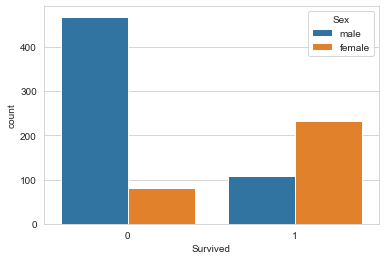

In [11]:
sns.countplot(x='Survived', data=tit, hue='Sex')

In [12]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

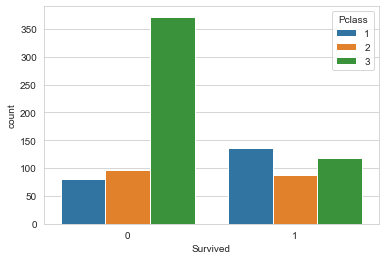

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=tit)

<AxesSubplot:xlabel='Age'>

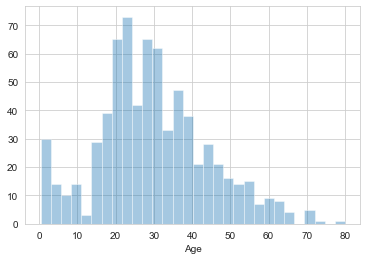

In [20]:
sns.distplot(tit['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

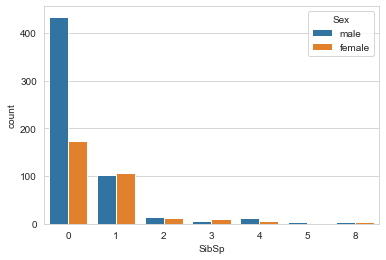

In [23]:
sns.countplot(x='SibSp', data=tit, hue='Sex')

<AxesSubplot:>

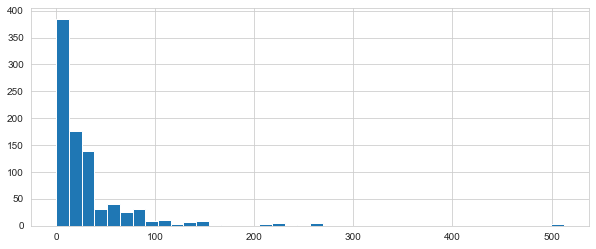

In [25]:
tit['Fare'].hist(bins=40, figsize=(10,4))

In [3]:
import cufflinks as cf

In [4]:
cf.go_offline()

In [30]:
tit['Fare'].iplot(bins=100, kind='hist')

In [23]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
tit['Age'] = tit[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

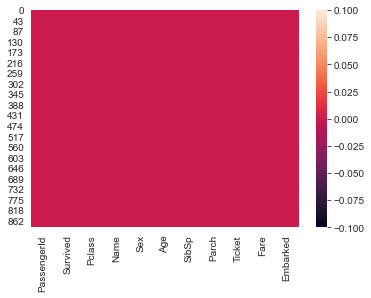

In [40]:
sns.heatmap(tit.isnull())

In [37]:
tit.drop('Cabin', 1, inplace=True)

In [38]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [25]:
tit.dropna(inplace=True)

In [26]:
sex = pd.get_dummies(tit['Sex'], drop_first=True)

In [27]:
embark = pd.get_dummies(tit['Embarked'], drop_first=True)

In [28]:
tit = pd.concat([tit, sex, embark], axis=1)

In [29]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [30]:
tit.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [31]:
tit.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [32]:
tit.drop('PassengerId', axis=1, inplace=True)

In [34]:
tit.drop('Cabin', axis=1, inplace=True)

In [35]:
tit.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [36]:
# for X, all cols but Survived, therefore...
X = tit.drop('Survived', axis=1)
y = tit['Survived']

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
6,1,54.0,0,0,51.8625,1,0,1
10,3,4.0,1,1,16.7000,0,0,1
11,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,1
872,1,33.0,0,0,5.0000,1,0,1
879,1,56.0,0,1,83.1583,0,0,0
887,1,19.0,0,0,30.0000,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(max_iter=202)

In [48]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=202)

In [49]:
ypred = logreg.predict(X_test)

In [50]:
ypred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.86      0.90      0.88        41

    accuracy                           0.84        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.83      0.84      0.83        61

